In [1]:
from acquire_codeup_blog import get_blog_articles
from prepare import prepare_article_data
from prepare import print_stop_words
from prepare import remove_stopwords

import re
import unicodedata
import pandas as pd
import nltk
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Exploration

1. Spam Data

    a. Load the spam data set.    

In [2]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

df = pd.read_csv('./spam_clean.csv')

In [3]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [4]:
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [5]:
word_counts = (pd.concat([all_freq, spam_freq, ham_freq], axis=1, sort=True)
                .set_axis(['all', 'spam', 'ham'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

In [6]:
word_counts['ratio'] = word_counts.spam/(word_counts.ham+.001)
word_counts.sort_values(by='ratio', ascending=False).head(10)

,all,spam,ham,ratio
claim,115,115,0,115000.0
prize,94,94,0,94000.0
tone,73,73,0,73000.0
guaranteed,50,50,0,50000.0
18,43,43,0,43000.0
awarded,38,38,0,38000.0
a1000,35,35,0,35000.0
150ppm,34,34,0,34000.0
a2000,31,31,0,31000.0
a150,27,27,0,27000.0


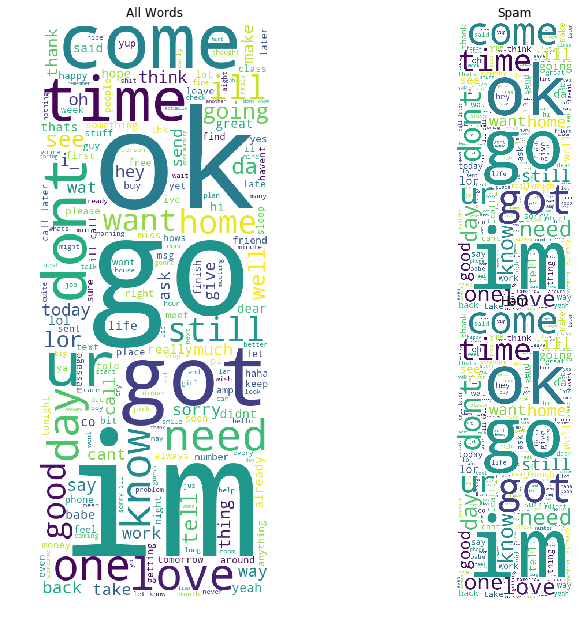

In [7]:
# WORD CLOUD FOR ALL WORDS IN EACH CATEGORY (ALL, SPAM, AND HAM)
cloud = WordCloud(background_color='white', height=1000, width=400)

all_cloud = cloud.generate(' '.join(all_words))
spam_cloud = cloud.generate(' '.join(spam_words))
ham_cloud = cloud.generate(' '.join(ham_words))

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(spam_cloud)
axs[2].imshow(ham_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Spam')
axs[2].set_title('Ham')

for ax in axs: ax.axis('off')

    b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?    

In [8]:
top_20_all_bigrams = (pd.Series(nltk.ngrams(all_words, 2))
                      .value_counts()
                      .head(20))
top_20_ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
                      .value_counts()
                      .head(20))
top_20_spam_bigrams = (pd.Series(nltk.ngrams(spam_words, 2))
                      .value_counts()
                      .head(20))

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/figure

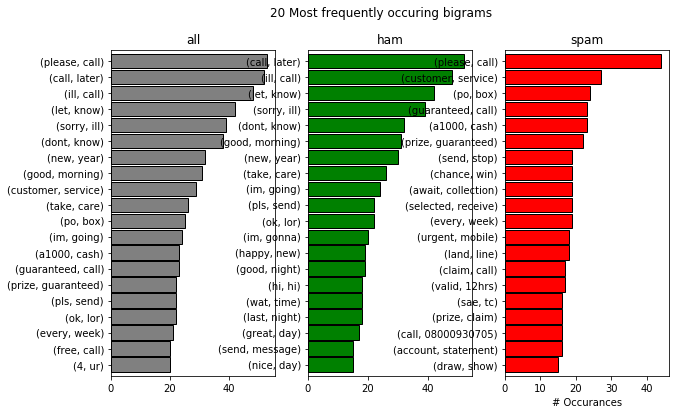

In [9]:
# HISTOGRAM OF BIGRAMS
fig = plt.figure()
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.title.set_text('all')
ax2.title.set_text('ham')
ax3.title.set_text('spam')

plt.subplot(131)
top_20_all_bigrams.sort_values().plot.barh(color='gray', edgecolor = 'black', width=.9, figsize=(10, 6))
plt.subplot(132)
top_20_ham_bigrams.sort_values().plot.barh(color='green', edgecolor = 'black', width=.9, figsize=(10, 6))
plt.subplot(133)
top_20_spam_bigrams.sort_values().plot.barh(color='red', edgecolor = 'black', width=.9, figsize=(10, 6))

plt.suptitle('20 Most frequently occuring bigrams')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
# labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
# _ = plt.yticks(ticks, labels)
plt.show()

(-0.5, 799.5, 399.5, -0.5)

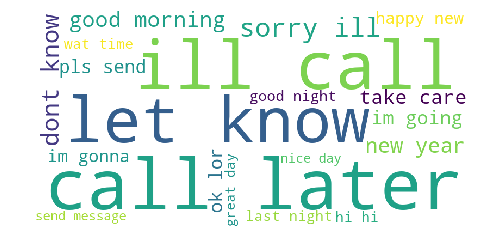

In [10]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.

cloud = WordCloud(background_color='white', width=800, height=400)
ham_data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
ham_img = cloud.generate_from_frequencies(ham_data)
plt.figure(figsize=(8, 4))
plt.imshow(ham_img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

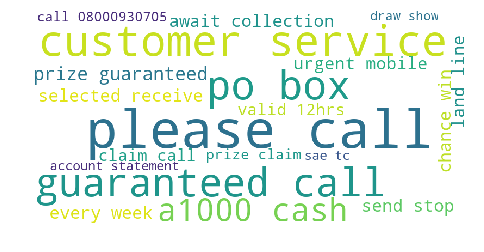

In [11]:
cloud = WordCloud(background_color='white', width=800, height=400)
spam_data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam_bigrams.to_dict().items()}
spam_img = cloud.generate_from_frequencies(spam_data)
plt.figure(figsize=(8, 4))
plt.imshow(spam_img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

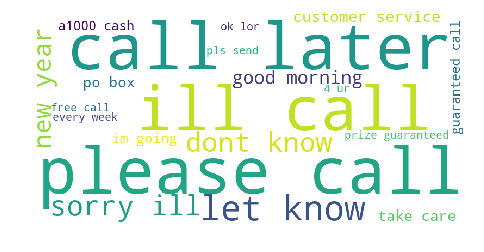

In [12]:
cloud = WordCloud(background_color='white', width=800, height=400)
all_data = {k[0] + ' ' + k[1]: v for k, v in top_20_all_bigrams.to_dict().items()}
all_img = cloud.generate_from_frequencies(all_data)
plt.figure(figsize=(8, 4))
plt.imshow(all_img)
plt.axis('off')

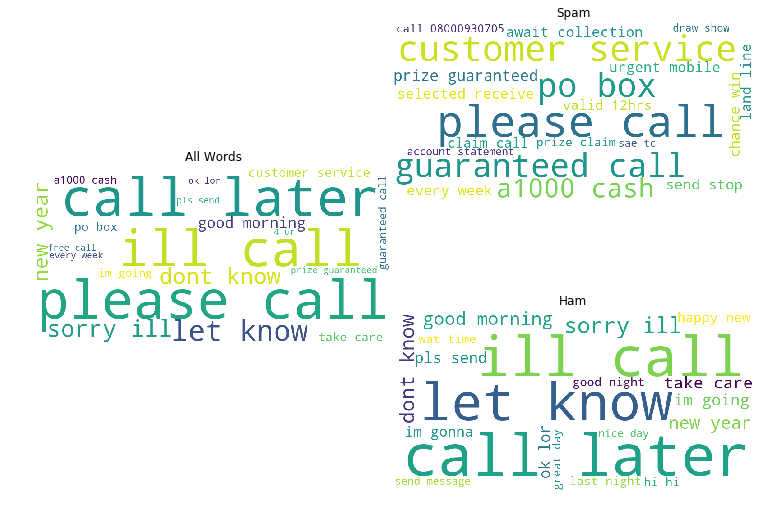

In [13]:
plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_img)
axs[1].imshow(spam_img)
axs[2].imshow(ham_img)

axs[0].set_title('All Words')
axs[1].set_title('Spam')
axs[2].set_title('Ham')

for ax in axs: ax.axis('off')

    c. Is there any overlap in the bigrams for the spam data and the ham data?   
            NO.

In [14]:
for key in all_data:
    print(key)
    if key in ham_data:
        print('\tham', end='')
    if key in spam_data:
        print('\tspam', end='')
    print()

please call
	spam
call later
	ham
ill call
	ham
let know
	ham
sorry ill
	ham
dont know
	ham
new year
	ham
good morning
	ham
customer service
	spam
take care
	ham
po box
	spam
im going
	ham
a1000 cash
	spam
guaranteed call
	spam
prize guaranteed
	spam
pls send
	ham
ok lor
	ham
every week
	spam
free call

4 ur



    d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.    

In [15]:
top_20_all_trigrams = (pd.Series(nltk.ngrams(all_words, 3))
                      .value_counts()
                      .head(20))
top_20_ham_trigrams = (pd.Series(nltk.ngrams(ham_words, 3))
                      .value_counts()
                      .head(20))
top_20_spam_trigrams = (pd.Series(nltk.ngrams(spam_words, 3))
                      .value_counts()
                      .head(20))

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/figure

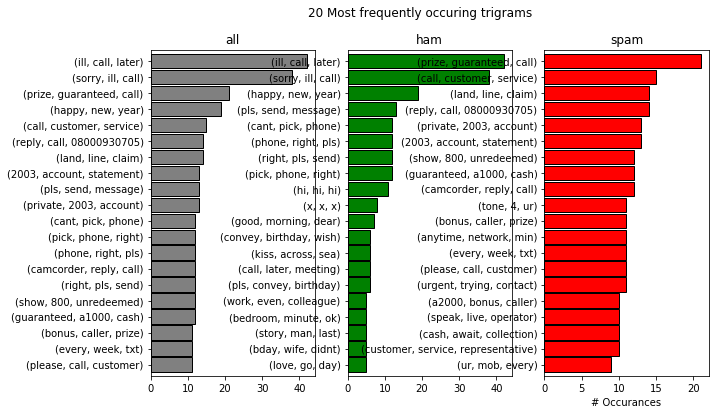

In [16]:
# HISTOGRAM OF TRIGRAMS
fig = plt.figure()
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.title.set_text('all')
ax2.title.set_text('ham')
ax3.title.set_text('spam')

plt.subplot(131)
top_20_all_trigrams.sort_values().plot.barh(color='gray', edgecolor = 'black', width=.9, figsize=(10, 6))
plt.subplot(132)
top_20_ham_trigrams.sort_values().plot.barh(color='green', edgecolor = 'black', width=.9, figsize=(10, 6))
plt.subplot(133)
top_20_spam_trigrams.sort_values().plot.barh(color='red', edgecolor = 'black', width=.9, figsize=(10, 6))

plt.suptitle('20 Most frequently occuring trigrams')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
# labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
# _ = plt.yticks(ticks, labels)
plt.show()


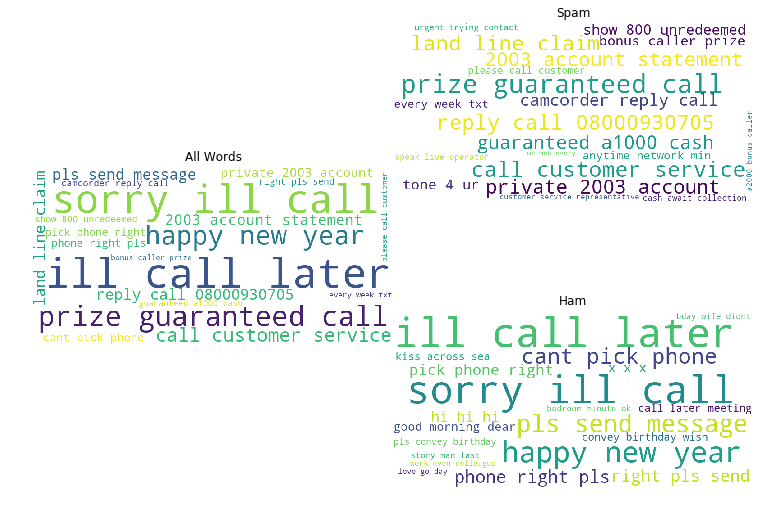

In [17]:
cloud = WordCloud(background_color='white', width=800, height=400)
ham_data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_ham_trigrams.to_dict().items()}
ham_img = cloud.generate_from_frequencies(ham_data)

cloud = WordCloud(background_color='white', width=800, height=400)
spam_data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_spam_trigrams.to_dict().items()}
spam_img = cloud.generate_from_frequencies(spam_data)


cloud = WordCloud(background_color='white', width=800, height=400)
all_data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_all_trigrams.to_dict().items()}
all_img = cloud.generate_from_frequencies(all_data)


plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_img)
axs[1].imshow(spam_img)
axs[2].imshow(ham_img)

axs[0].set_title('All Words')
axs[1].set_title('Spam')
axs[2].set_title('Ham')

for ax in axs: ax.axis('off')

In [18]:
for key in all_data:
    print(key)
    if key in ham_data:
        print('\tham', end='')
    if key in spam_data:
        print('\tspam', end='')
    print()
# again, no overlap at all

ill call later
	ham
sorry ill call
	ham
prize guaranteed call
	spam
happy new year
	ham
call customer service
	spam
reply call 08000930705
	spam
land line claim
	spam
pls send message
	ham
2003 account statement
	spam
private 2003 account
	spam
cant pick phone
	ham
pick phone right
	ham
phone right pls
	ham
camcorder reply call
	spam
right pls send
	ham
show 800 unredeemed
	spam
guaranteed a1000 cash
	spam
every week txt
	spam
bonus caller prize
	spam
please call customer
	spam


2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [19]:
'''create a list of extra words and another of words to exclude from the stoplist'''
extra_words = ['']
exclude_words = ['']

In [20]:
articles = get_blog_articles()
transformed_data = prepare_article_data(articles, extra_words, exclude_words)
print(len(transformed_data), 'articles in the list', end='\n\n')
for i in range(len(transformed_data)):
    print(transformed_data[i]['title'])

5 articles in the list

codeups-data-science-career-accelerator-is-here
data-science-myths
data-science-vs-data-analytics-whats-the-difference
10-tips-to-crush-it-at-the-sa-tech-job-fair
competitor-bootcamps-are-closing-is-the-model-in-danger


In [21]:
article_words = (transformed_data[0]['clean']).split(' ')
article_words[:5]

['rumors', 'true', 'time', 'arrived', 'codeup']

In [22]:
word_freq = (pd.Series(article_words)
                      .value_counts()
                      .head(20))
word_freq

data            13
science          7
program          5
learning         5
machine          4
available        3
antonio          3
san              3
time             3
development      3
14               2
hiring           2
applications     2
codeup           2
applied          2
like             2
6                2
deployment       2
seats            2
first            2
dtype: int64

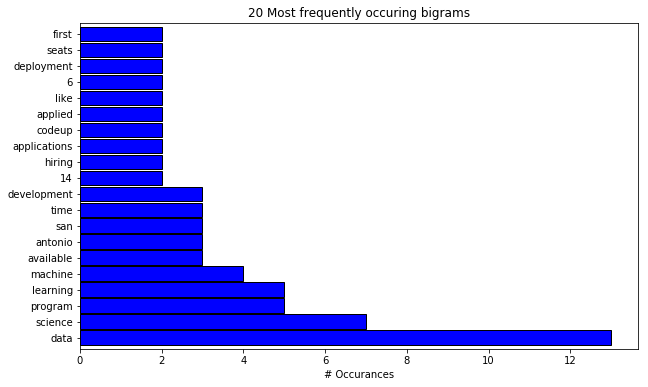

In [23]:
# HISTOGRAM OF WORD_FREQ
fig = plt.figure()

word_freq.plot.barh(color='blue', edgecolor = 'black', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring bigrams')
plt.xlabel('# Occurances')

plt.show()

(-0.5, 799.5, 399.5, -0.5)

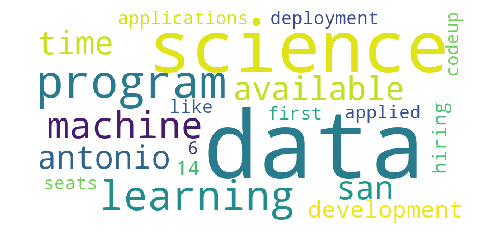

In [24]:
cloud = WordCloud(background_color='white', width=800, height=400)
all_img = cloud.generate_from_frequencies(word_freq)
plt.figure(figsize=(8, 4))
plt.imshow(all_img)
plt.axis('off')

In [25]:
top_20_all_bigrams = (pd.Series(nltk.ngrams(article_words, 2))
                      .value_counts()
                      .head(20))

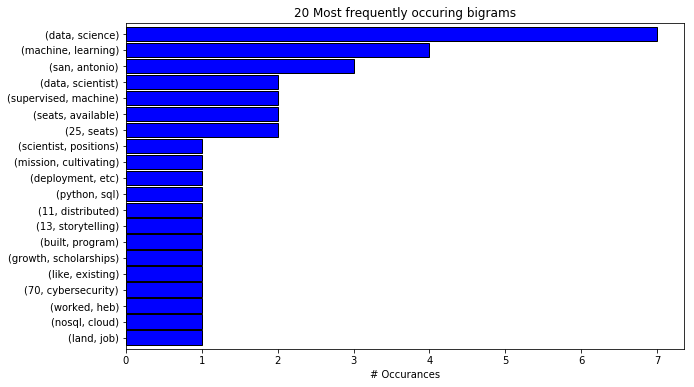

In [26]:
# HISTOGRAM OF BIGRAMS
fig = plt.figure()

top_20_all_bigrams.sort_values().plot.barh(color='blue', edgecolor = 'black', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring bigrams')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
# labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
# _ = plt.yticks(ticks, labels)
plt.show()

(-0.5, 799.5, 399.5, -0.5)

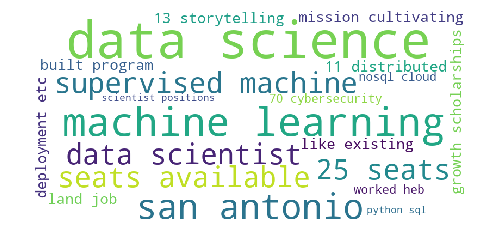

In [27]:
cloud = WordCloud(background_color='white', width=800, height=400)
all_data = {k[0] + ' ' + k[1]: v for k, v in top_20_all_bigrams.to_dict().items()}
all_img = cloud.generate_from_frequencies(all_data)
plt.figure(figsize=(8, 4))
plt.imshow(all_img)
plt.axis('off')

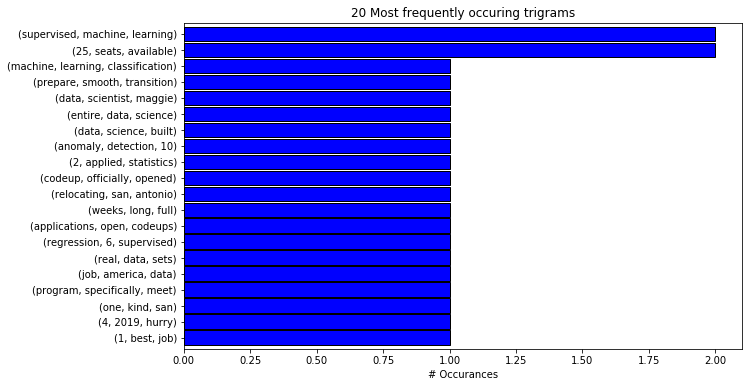

In [28]:
top_20_all_trigrams = (pd.Series(nltk.ngrams(article_words, 3))
                      .value_counts()
                      .head(20))

top_20_all_trigrams.sort_values().plot.barh(color='blue', edgecolor = 'black', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring trigrams')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
# labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
# _ = plt.yticks(ticks, labels)
plt.show()

(-0.5, 799.5, 399.5, -0.5)

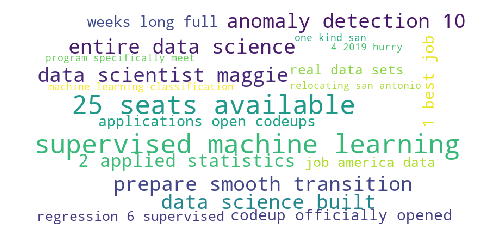

In [29]:
cloud = WordCloud(background_color='white', width=800, height=400)
all_data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_all_trigrams.to_dict().items()}
all_img = cloud.generate_from_frequencies(all_data)
plt.figure(figsize=(8, 4))
plt.imshow(all_img)
plt.axis('off')

3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [30]:
from acquire_codeup_blog import get_blog_articles
from acquire_news_articles import get_news_data
from prepare import prepare_article_data
from prepare import print_stop_words
from prepare import remove_stopwords

In [31]:
'''create a list of extra words and another of words to exclude from the stoplist'''
extra_words = ['codeup']
exclude_words = ['']

In [52]:
articles = get_news_data()
articles.tail()

,category,content,title
18,entertainment,Ananya Panday revealed she was bullied in scho...,I was bullied & called hunchback in school as ...
19,entertainment,Actor Nawazuddin Siddiqui will reportedly be s...,Nawazuddin to feature in Housefull 4 song as e...
20,entertainment,"Opening up about her weight loss journey, actr...",It started with transition from pizza to salad...
21,entertainment,A Sikh body approached the Akal Takht to lodge...,Complaint against Sunny for disrespecting Sikh...
22,entertainment,Paresh Rawal has reportedly joined the cast of...,Paresh to feature in Varun's 'Coolie No. 1' re...


In [60]:
articles.keys()

Index(['category', 'content', 'title'], dtype='object')

In [58]:
transformed_articles = []

for article_index in range(len(articles)):
    
    article = articles['content'][article_index]
    original = article

    '''
    apply some basic text cleaning to the string, article:
        - lowercase everything
        - normalize unicode characters
        - replace anything that is not a letter, number, whitespace or a single quote
    '''
    article = basic_clean(article)

    '''tokenize all the words in the string, article'''
    article = tokenize(article)

    '''applying stemming to all the words in the string, article'''
    article_stemmed = stem(article)
    
    ''''apply lemmatization to each word in the string, article'''
    article_lemmatized = lemmatize(article)
    
    '''remove all the stopwords, including all the words in extra_words and excluding
    all the words in exclude list'''
    article_without_stopwords = remove_stopwords(article, extra_words, exclude_words)

    keys = list(this_dict.keys())
    
    new_dict = {
         'title': this_dict['title'],
         'original': original,
         'category': [this_dict['category'] if 'category' in keys else 'blog'],
         'stemmed': article_stemmed,
         'lemmatized': article_lemmatized,
         'clean': article_without_stopwords
        }
    
    
    
    
    
    new_dict.append(transformed_entry.copy())

print(new_dict)

NameError: name 'basic_clean' is not defined

In [40]:
transformed_data = prepare_article_data(articles, extra_words, exclude_words)
print(len(transformed_data), 'articles in the list', end='\n\n')
for i in range(len(transformed_data)):
    print(transformed_data[i]['title'])